In [ ]:
# Name - Nalawade Prafulla Chandrashekhar.
# Class - BE Artificial Intelligence and Data Science.
# Roll No. - 42
# Practical No.10 - Implement Ant colony optimization by solving the Traveling salesman problem using python  
#                   Problem statement- A salesman needs to visit a set of cities exactly once and return to the original 
#                   city. The task is to find the shortest possible route that the salesman can take to visit all the cities 
#                   and return to the starting city. 

In [25]:
# Import Required Libraries

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [27]:
# Define coordinates for each city (for visualization purposes)
city_coordinates = np.array([
    [0, 0],  # City 0
    [10, 0],  # City 1
    [10, 10],  # City 2
    [0, 10]   # City 3
])

In [28]:
# Define the distance matrix (distances between cities)

In [29]:
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

In [30]:
# Parameters for Ant Colony Optimization
num_ants = 10
num_iterations = 50
evaporation_rate = 0.5
pheromone_constant = 1.0
heuristic_constant = 1.0

In [38]:
# Initialize pheromone matrix and visibility matrix
num_cities = len(distance_matrix)
pheromone = np.ones((num_cities, num_cities))  # Pheromone matrix

# Handle division by zero in visibility matrix (replace 0s with infinity)
visibility = np.where(distance_matrix == 0, np.inf, 1 / distance_matrix)

C:\Users\saira\AppData\Local\Temp\ipykernel_37812\3934188323.py:6: RuntimeWarning: divide by zero encountered in divide
  visibility = np.where(distance_matrix == 0, np.inf, 1 / distance_matrix)


In [39]:
# ACO algorithm
for iteration in range(num_iterations):
    ant_routes = []
    for ant in range(num_ants):
        current_city = random.randint(0, num_cities - 1)
        visited_cities = [current_city]
        route = [current_city]
        
        while len(visited_cities) < num_cities:
            probabilities = []
            for city in range(num_cities):
                if city not in visited_cities:
                    pheromone_value = pheromone[current_city][city]
                    visibility_value = visibility[current_city][city]
                    probability = (pheromone_value ** pheromone_constant) * (visibility_value ** heuristic_constant)
                    probabilities.append((city, probability))
            
            probabilities = sorted(probabilities, key=lambda x: x[1], reverse=True)
            selected_city = probabilities[0][0]
            route.append(selected_city)
            visited_cities.append(selected_city)
            current_city = selected_city
        
        ant_routes.append(route)
        
        # Update pheromone levels
    delta_pheromone = np.zeros((num_cities, num_cities))
    for ant, route in enumerate(ant_routes):
        for i in range(len(route) - 1):
            city_a = route[i]
            city_b = route[i + 1]
            delta_pheromone[city_a][city_b] += 1 / distance_matrix[city_a][city_b]
            delta_pheromone[city_b][city_a] += 1 / distance_matrix[city_a][city_b]
    
    pheromone = (1 - evaporation_rate) * pheromone + delta_pheromone

In [40]:
# Find the best route
best_route_index = np.argmax([sum(distance_matrix[cities[i]][cities[(i + 1) % num_cities]] for i in range(num_cities)) for cities in ant_routes])
best_route = ant_routes[best_route_index]
shortest_distance = sum(distance_matrix[best_route[i]][best_route[(i + 1) % num_cities]] for i in range(num_cities))

In [41]:
print("Best route:", best_route)
print("Shortest distance:", shortest_distance)

Best route: [0, 1, 3, 2]
Shortest distance: 80


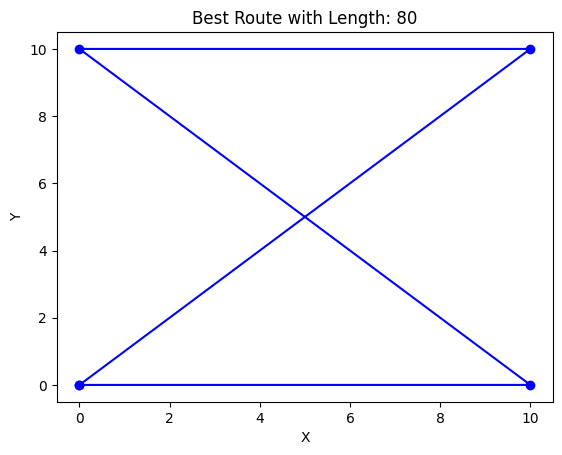

In [42]:
# Visualize the best route using city coordinates
best_route_coords = city_coordinates[best_route]  # Get the coordinates of the best route
best_route_coords = np.vstack([best_route_coords, best_route_coords[0]])  # Add the starting city at the end to close the loop
x, y = zip(*best_route_coords)  # Unpack coordinates

plt.plot(x, y, 'o-', color='blue')
plt.title(f"Best Route with Length: {shortest_distance}")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
